Cardiovascular diseases are among the most leading cause of deaths in the world.
According to World Health Organization,they take each year over 17 Million lives.
The early diagnosis and identifying of risk factors can contribute to save  lives through adapting the appropriate treatment.

In This project we will study and build a model of Machine Learning to help predict Heart Failure through analyzing a key risk factors as blood pressure and Cholesterol rate.


**Link Of the DataSet**

https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd/content/drive/My Drive/Python Collabs/Data Science Project

/content/drive/My Drive/Python Collabs/Data Science Project


#1-Features Defining

**Age:** age of the subject [years]

**Sex:** sex of the subject [M: Male, F: Female]

**ChestPainType:** chest pain type 

-TA: Typical Angina 

-ATA: Atypical Angina

-NAP: Non-Anginal Pain

-ASY: Asymptomatic

**RestingBP:** resting blood pressure [mm Hg]

**Cholesterol:** serum cholesterol [mm/dl]

**FastingBS:** fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

**RestingECG:** resting electrocardiogram results 

-Normal: Normal 

-ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV),

-LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria

**MaxHR:** maximum heart rate achieved [Numeric value between 60 and 202]

**ExerciseAngina:** exercise-induced angina [Y: Yes, N: No]

**Oldpeak:** oldpeak = ST [Numeric value measured in depression]
ST depression induced by exercise relative to rest		

**ST_Slope:** the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

**HeartDisease:** output class [1: heart disease, 0: Normal]




#2-Importing Libraries

In [3]:
import pandas as pd
import numpy as np
from scipy import stats as st
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
ds=pd.read_csv("heart.csv",sep=',')

**Shwoing The Top 5 instances of our dataSet**

In [5]:
ds.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


#3-Examine the descriptive statistics of the dataframe

In [7]:
print('statistic description for continious variables')
ds.describe().style.background_gradient(cmap='plasma').set_properties(**{'font-family': 'Segoe UI'})

statistic description for continious variables


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [8]:
ds.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

No Null Values

In [9]:
ds['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

**The data is balanced, it shows as many cases of ill subjects as healthy ones**

This, will be a strong point in the performance of the machine learning model

In [10]:
ds.describe(include='object')

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


This part shows the dominant occurneces of each attributes:

For Example the ST Segment Slope is in the most cases Flat with 460 occurences

wich represents near 50% of the entire cases.

#4-Data Transformation

Transforming data to numerical values

In [11]:
cleanup_Sex={"Sex":{"M":0,"F":1}}
cleanup_ChestPainType={"ChestPainType":{"ATA":0,"NAP":1,"ASY":2,"TA":3}}
cleanup_RestingECG={"RestingECG":{"Normal":0,"ST":1,"LVH":2}}
cleanup_ExerciseAngina={"ExerciseAngina":{"N":0,"Y":1}}
cleanup_ST_Slope={"ST_Slope":{"Up":0,"Flat":1,"Down":2}}

ds.replace(cleanup_Sex,inplace=True)
ds.replace(cleanup_ChestPainType,inplace=True)
ds.replace(cleanup_RestingECG,inplace=True)
ds.replace(cleanup_ExerciseAngina,inplace=True)
ds.replace(cleanup_ST_Slope,inplace=True)

In [12]:
ds

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,0,172,0,0.0,0,0
1,49,1,1,160,180,0,0,156,0,1.0,1,1
2,37,0,0,130,283,0,1,98,0,0.0,0,0
3,48,1,2,138,214,0,0,108,1,1.5,1,1
4,54,0,1,150,195,0,0,122,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,3,110,264,0,0,132,0,1.2,1,1
914,68,0,2,144,193,1,0,141,0,3.4,1,1
915,57,0,2,130,131,0,0,115,1,1.2,1,1
916,57,1,0,130,236,0,2,174,0,0.0,1,1


All data are converted to numeric now

#5-Data Visualization

In [13]:
list_features=(list(ds.columns))

In [14]:
list_features

['Age',
 'Sex',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak',
 'ST_Slope',
 'HeartDisease']

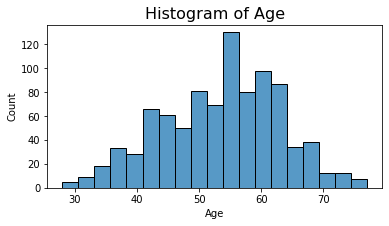

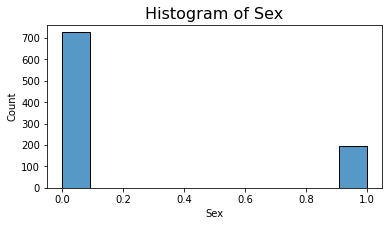

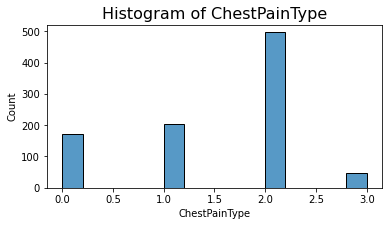

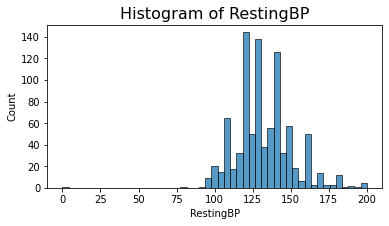

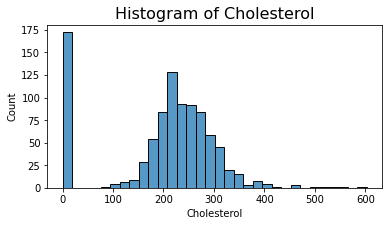

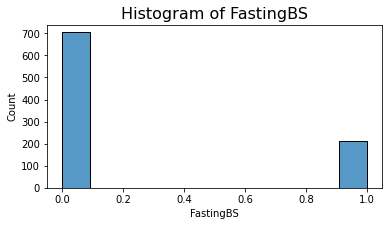

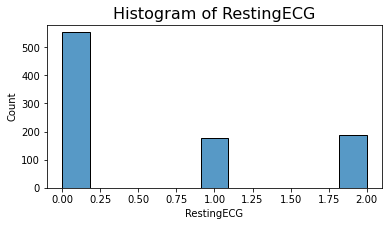

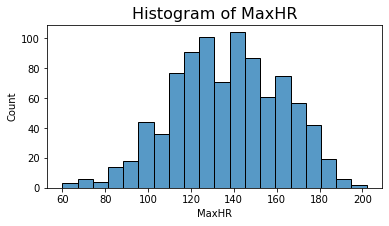

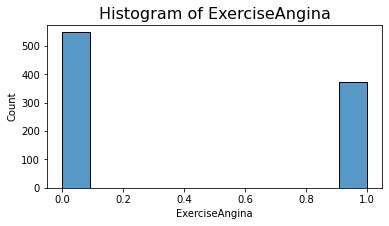

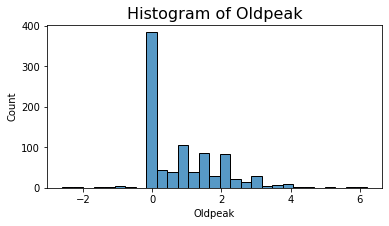

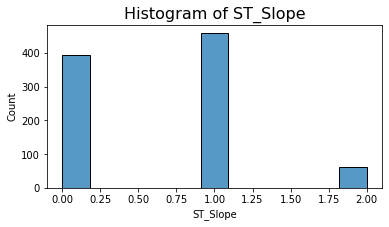

In [15]:
for i in range(0,len(list_features)-1):
   plt.figure(figsize=(6,3))
   sns.histplot(ds[list_features[i]])
   plt.title('Histogram of '+ list_features[i], size=16)

The distribution of the features are not normal

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

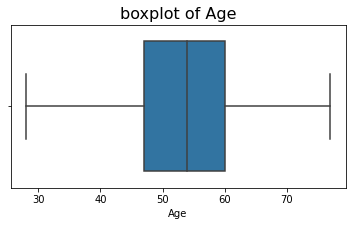

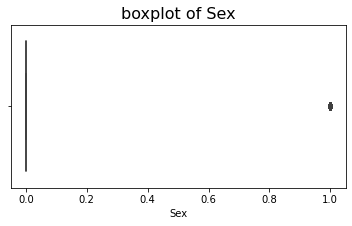

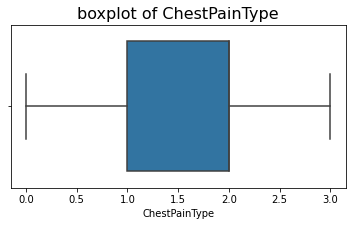

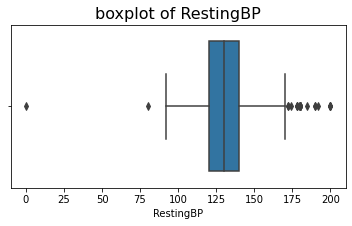

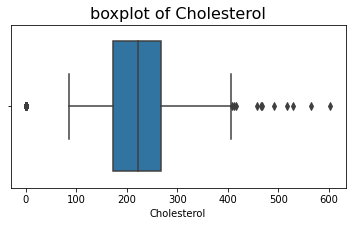

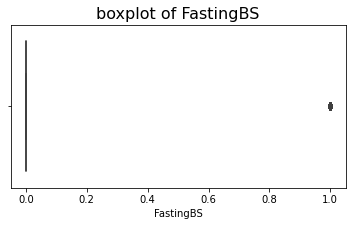

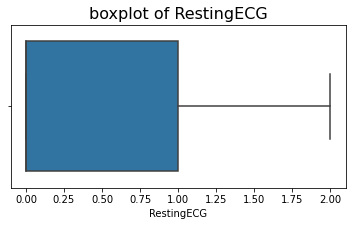

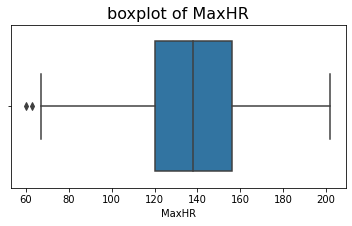

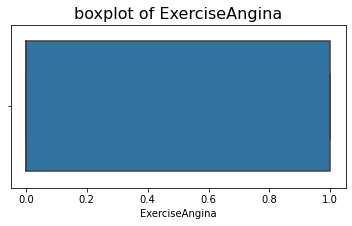

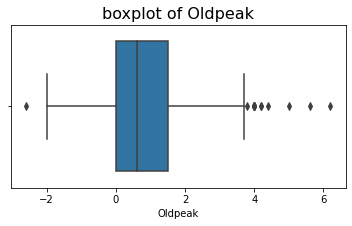

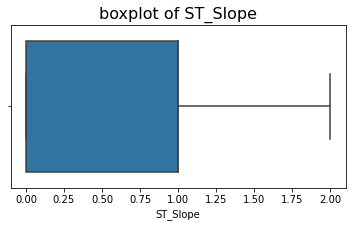

In [16]:
for i in range(0,len(list_features)-1):
   plt.figure(figsize=(6,3))
   sns.boxplot(ds[list_features[i]])
   plt.title('boxplot of '+ list_features[i], size=16)

Eventhough it appears that a certain fetures have an outliers : 

The values are typical for heart disease subjects as

Cholestorel > 400 mg/DL
RestingBP > 160 mmHg

1    0.553377
0    0.446623
Name: HeartDisease, dtype: float64


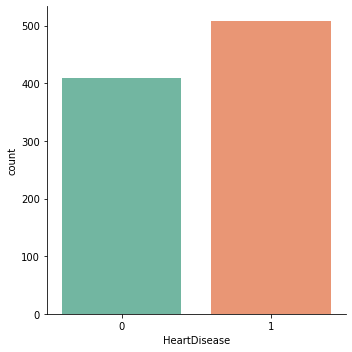

In [17]:
print(ds["HeartDisease"].value_counts(normalize=True))
sns.catplot(x="HeartDisease",kind="count",data=ds,palette="Set2")

As mentionned below the data is balanced on target cases

nearly 55% vs 45% 

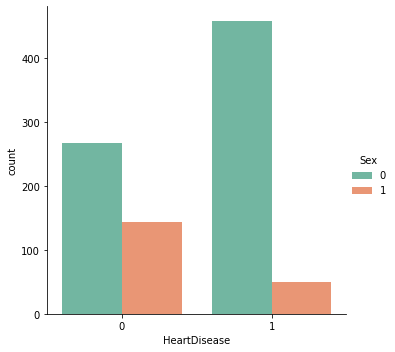

In [18]:
sns.catplot(x="HeartDisease", kind="count",hue="Sex", data=ds,palette="Set2")

These data shows that the studied cases lead to the fact that the most vulnerable subjects to heart failure are Men.

We must treat this information carefulyy because the dataset contains 78% of occurences "Sex" as Male.

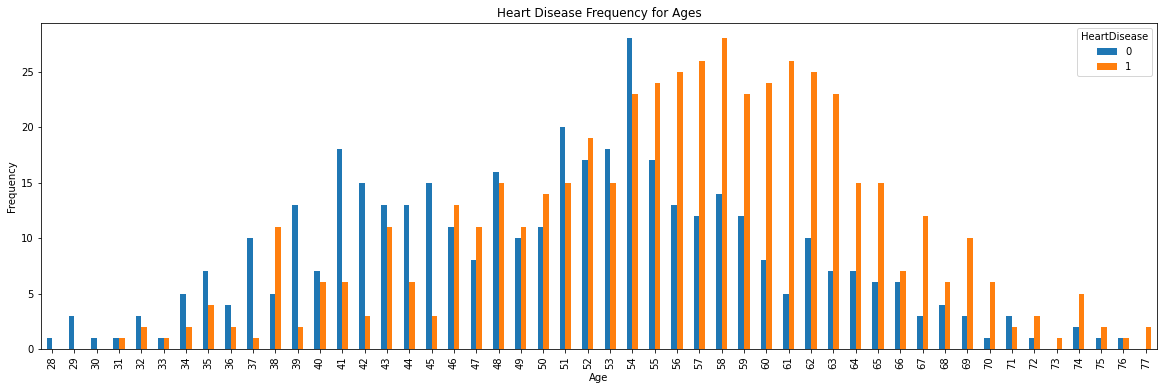

In [19]:
pd.crosstab(ds.Age,ds.HeartDisease).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

The graph shows an increasing of heart failure probability on the study sample with the age starting from 55 years old, the probability to develop a heart failure is more likely to occur from this age.

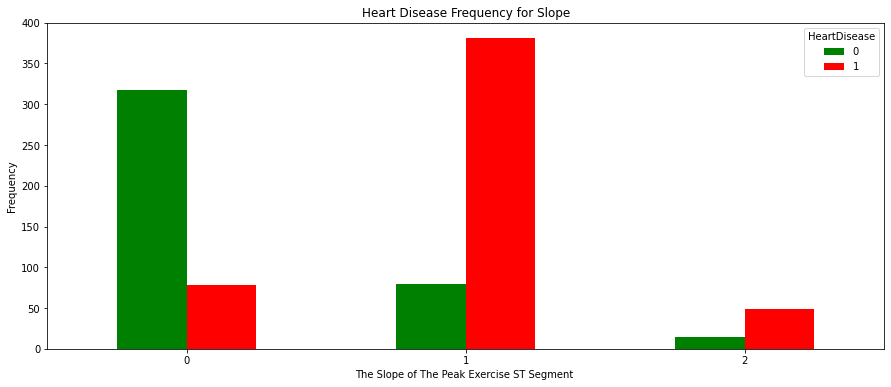

In [20]:
pd.crosstab(ds.ST_Slope,ds.HeartDisease).plot(kind="bar",figsize=(15,6),color=['green','red' ])
plt.title('Heart Disease Frequency for Slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

The graph shows that if the ST segment slop is Flat=1 or down=2 the subject is in a greater risk to be ill.

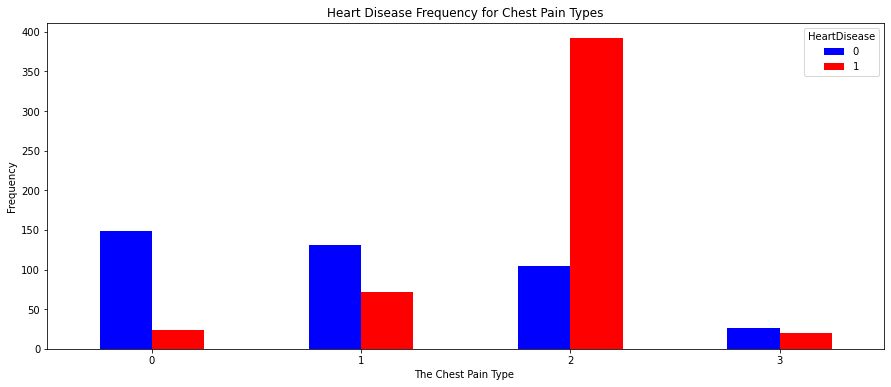

In [21]:
pd.crosstab(ds.ChestPainType,ds.HeartDisease).plot(kind="bar",figsize=(15,6),color=['blue','red' ])
plt.title('Heart Disease Frequency for Chest Pain Types')
plt.xlabel('The Chest Pain Type ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

The Chest Pain Type 2 = Asymptomatic , 

is obviously the most dangerous 'Hidden Symptom' for heart failure risk.

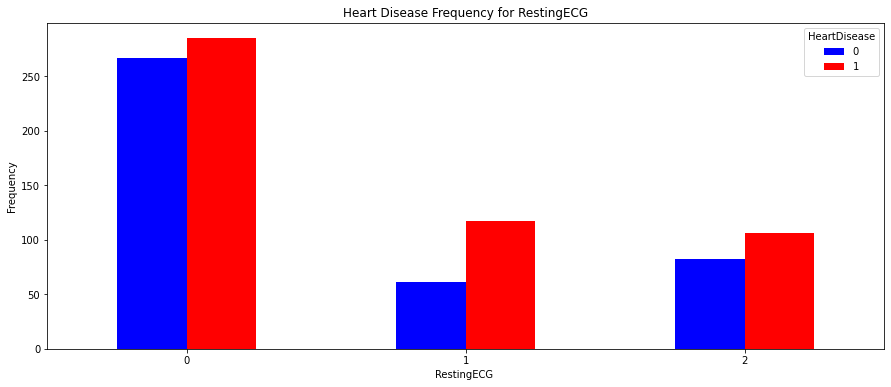

In [22]:
pd.crosstab(ds.RestingECG,ds.HeartDisease).plot(kind="bar",figsize=(15,6),color=['blue','red' ])
plt.title('Heart Disease Frequency for RestingECG')
plt.xlabel('RestingECG ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

The graph lead to these conclusions:

1-If the Resting ECG is Normal or LVH (Left Ventricular Hypertrophy) , we cannot conclude about heartfailure.

2-If the ST segment is abnormal : 60% of heartfailure probability

In [23]:
list_feat=['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope',]

#6-Data Standardization

In [24]:
from sklearn.preprocessing import StandardScaler
# extracting out the features
x = ds.values
# Standardizing the features
x_standardized = StandardScaler().fit_transform(x)
x_standardized

array([[-1.4331398 , -0.51595242, -1.70557305, ..., -0.83243239,
        -1.05211381, -1.11311472],
       [-0.47848359,  1.93816322, -0.53099236, ...,  0.10566353,
         0.59607813,  0.89837999],
       [-1.75135854, -0.51595242, -1.70557305, ..., -0.83243239,
        -1.05211381, -1.11311472],
       ...,
       [ 0.37009972, -0.51595242,  0.64358833, ...,  0.29328271,
         0.59607813,  0.89837999],
       [ 0.37009972,  1.93816322, -1.70557305, ..., -0.83243239,
         0.59607813,  0.89837999],
       [-1.64528563, -0.51595242, -0.53099236, ..., -0.83243239,
        -1.05211381, -1.11311472]])

In [25]:
x_standardized.shape

(918, 12)

In [26]:
cov_data = np.corrcoef(x_standardized.T)

**Plotting correlations matrix**

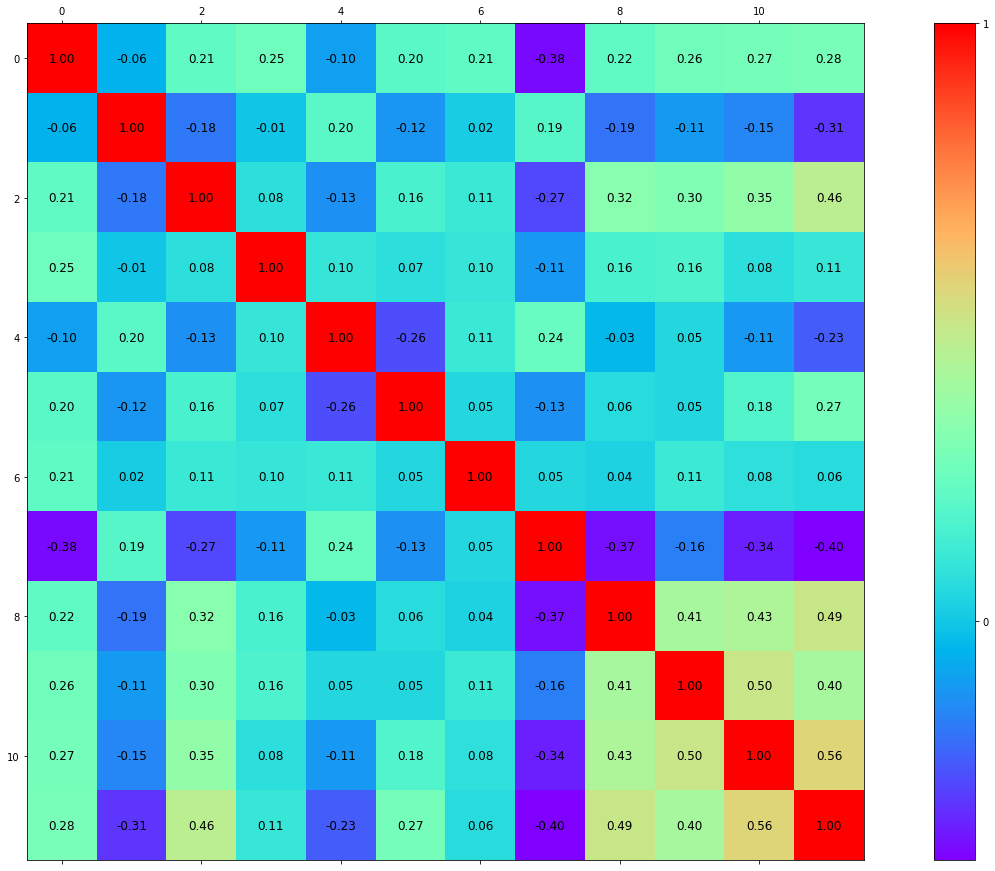

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,15))
img = plt.matshow(cov_data,fignum=1, cmap=plt.cm.rainbow)
plt.colorbar(img, ticks = [-1, 0, 1], fraction=0.045)
for x in range(cov_data.shape[0]):
    for y in range(cov_data.shape[1]):
        plt.text(x, y, "%0.2f" % cov_data[x,y], size=12, color='black', ha="center", va="center")
        
plt.show()

No significant correlations between the features so we take all the attributes in our model.

In [28]:
list_features

['Age',
 'Sex',
 'ChestPainType',
 'RestingBP',
 'Cholesterol',
 'FastingBS',
 'RestingECG',
 'MaxHR',
 'ExerciseAngina',
 'Oldpeak',
 'ST_Slope',
 'HeartDisease']

In [29]:
ds_std=pd.DataFrame(x_standardized,columns=list_features) #return to the standardized dataset

In [30]:
x_standardized

array([[-1.4331398 , -0.51595242, -1.70557305, ..., -0.83243239,
        -1.05211381, -1.11311472],
       [-0.47848359,  1.93816322, -0.53099236, ...,  0.10566353,
         0.59607813,  0.89837999],
       [-1.75135854, -0.51595242, -1.70557305, ..., -0.83243239,
        -1.05211381, -1.11311472],
       ...,
       [ 0.37009972, -0.51595242,  0.64358833, ...,  0.29328271,
         0.59607813,  0.89837999],
       [ 0.37009972,  1.93816322, -1.70557305, ..., -0.83243239,
         0.59607813,  0.89837999],
       [-1.64528563, -0.51595242, -0.53099236, ..., -0.83243239,
        -1.05211381, -1.11311472]])

In [31]:
ds_std.HeartDisease=ds.HeartDisease #Transforming the target feature to binary for the model

In [32]:
ds_std

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,-0.515952,-1.705573,0.410909,0.825070,-0.551341,-0.749180,1.382928,-0.823556,-0.832432,-1.052114,0
1,-0.478484,1.938163,-0.530992,1.491752,-0.171961,-0.551341,-0.749180,0.754157,-0.823556,0.105664,0.596078,1
2,-1.751359,-0.515952,-1.705573,-0.129513,0.770188,-0.551341,0.492241,-1.525138,-0.823556,-0.832432,-1.052114,0
3,-0.584556,1.938163,0.643588,0.302825,0.139040,-0.551341,-0.749180,-1.132156,1.214246,0.574711,0.596078,1
4,0.051881,-0.515952,-0.530992,0.951331,-0.034755,-0.551341,-0.749180,-0.581981,-0.823556,-0.832432,-1.052114,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,-0.515952,1.818169,-1.210356,0.596393,-0.551341,-0.749180,-0.188999,-0.823556,0.293283,0.596078,1
914,1.536902,-0.515952,0.643588,0.627078,-0.053049,1.813758,-0.749180,0.164684,-0.823556,2.357094,0.596078,1
915,0.370100,-0.515952,0.643588,-0.129513,-0.620168,-0.551341,-0.749180,-0.857069,1.214246,0.293283,0.596078,1
916,0.370100,1.938163,-1.705573,-0.129513,0.340275,-0.551341,1.733661,1.461525,-0.823556,-0.832432,0.596078,1


#7-Machine Learning Models

**7-1 Logistic Regression Model**

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#features extraction
x = ds_std[['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope']]
y = ds_std['HeartDisease']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=20)  
#splitting data with test size of 20%
logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred_log  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.85


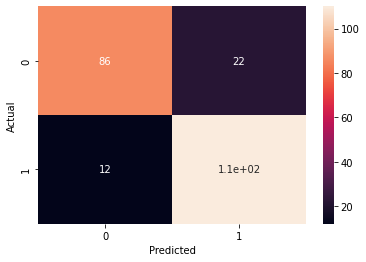

In [34]:
confusion_matrix = pd.crosstab(y_test, y_pred_log, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

The model of Logistic Regression shows an accuracy of 85 % in the test data.

12 Cases are declared Helathy despite their Illness  (False Negative) = 5%

One of the purposes from the study of these datasets types is to minimize the False Negative cases.

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.88      0.80      0.83       108
           1       0.83      0.90      0.87       122

    accuracy                           0.85       230
   macro avg       0.86      0.85      0.85       230
weighted avg       0.85      0.85      0.85       230



**ROC-AUC Classification**

ROC-AUC Curve is a measurement of classification algorithms performances
*   The ROC curve is plotted with TPR against the FPR where TPR is on the y-axis and FPR is on the x-axis.
* The best possible predict is made in the position [0,1] representing 100% sensitivity (no false prediction) and it is called
perfect classification where point [1,0] is the opposite (100% false predictions)
* The diagonal divides the curve into two parts : Points above the diagonal (better than random) and points under the diagonal (worse than random)
* The curve is also called sensitivity / 1-specificity graph : TPR/1-TNR 

In [36]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [37]:
y_score0 = logreg.predict_proba(x_test)[:,1]

In [38]:
false_positive_rate2, true_positive_rate0, threshold0= roc_curve(y_test, y_score0)

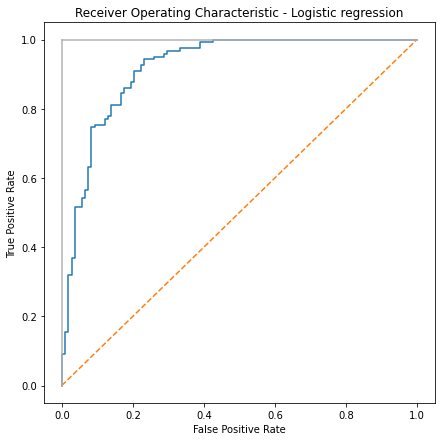

In [39]:
plt.subplots(1, figsize=(7,7))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate2, true_positive_rate0)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [40]:
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_test, y_score0))

roc_auc_score for Logistic Regression:  0.9186399514268367


**7-2 KNN Model**

In [41]:
#import the relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn=KNeighborsClassifier(n_neighbors=20) #build our knn classifier
knn.fit(x_train,y_train) #Training KNN classifier
y_pred_knn=knn.predict(x_test)  #Testing
print('Acuuracy=',accuracy_score(y_pred_knn,y_test))

Acuuracy= 0.8608695652173913


In [42]:
n_neighbors=30
scores=[]
for k in range(1,30):
    knn=KNeighborsClassifier(n_neighbors-k)
    knn.fit(x_train,y_train)
    y1_pred=knn.predict(x_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y1_pred,y_test),2))
    scores.append(round(accuracy_score(y1_pred,y_test),2))

Accuracy for k= 1 is: 0.85
Accuracy for k= 2 is: 0.86
Accuracy for k= 3 is: 0.86
Accuracy for k= 4 is: 0.86
Accuracy for k= 5 is: 0.86
Accuracy for k= 6 is: 0.86
Accuracy for k= 7 is: 0.87
Accuracy for k= 8 is: 0.87
Accuracy for k= 9 is: 0.87
Accuracy for k= 10 is: 0.86
Accuracy for k= 11 is: 0.87
Accuracy for k= 12 is: 0.86
Accuracy for k= 13 is: 0.86
Accuracy for k= 14 is: 0.86
Accuracy for k= 15 is: 0.87
Accuracy for k= 16 is: 0.87
Accuracy for k= 17 is: 0.87
Accuracy for k= 18 is: 0.87
Accuracy for k= 19 is: 0.87
Accuracy for k= 20 is: 0.88
Accuracy for k= 21 is: 0.87
Accuracy for k= 22 is: 0.87
Accuracy for k= 23 is: 0.87
Accuracy for k= 24 is: 0.88
Accuracy for k= 25 is: 0.86
Accuracy for k= 26 is: 0.87
Accuracy for k= 27 is: 0.86
Accuracy for k= 28 is: 0.81
Accuracy for k= 29 is: 0.82


Text(0, 0.5, 'Testing Accuracy')

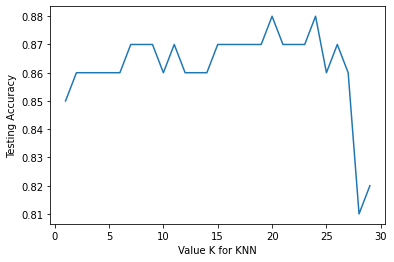

In [43]:
import matplotlib.pyplot as plt
plt.plot(range(1,30),scores)
plt.xlabel('Value K for KNN')
plt.ylabel('Testing Accuracy')

In [44]:
#import the relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_op=KNeighborsClassifier(n_neighbors=20) #build our knn classifier
knn_op.fit(x_train,y_train) #Training KNN classifier
y_pred_knn_op=knn_op.predict(x_test)  #Testing
print('Acuuracy=',accuracy_score(y_pred_knn_op,y_test))

Acuuracy= 0.8608695652173913


choosing the ideal K parameter led to **k=20 neighboors**

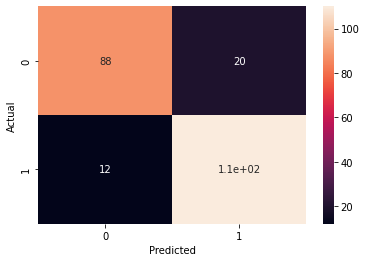

In [45]:
confusion_matrix = pd.crosstab(y_test, y_pred_knn_op, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

the same 5% of FN (12 Cases) similar to Logistic Regression

**7-3 Decision tree and random forest**

In [46]:
#importing relevant libraries
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#applying tree algorithm
model = tree.DecisionTreeClassifier()  
model.fit(x_train, y_train)   #fitting our model
y_pred_DT=model.predict(x_test)   # evaluating our model
print("The score for this model is:{}".format(accuracy_score(y_pred_DT,y_test)))

The score for this model is:0.7869565217391304


In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_DT))

              precision    recall  f1-score   support

           0       0.82      0.70      0.76       108
           1       0.77      0.86      0.81       122

    accuracy                           0.79       230
   macro avg       0.79      0.78      0.78       230
weighted avg       0.79      0.79      0.79       230



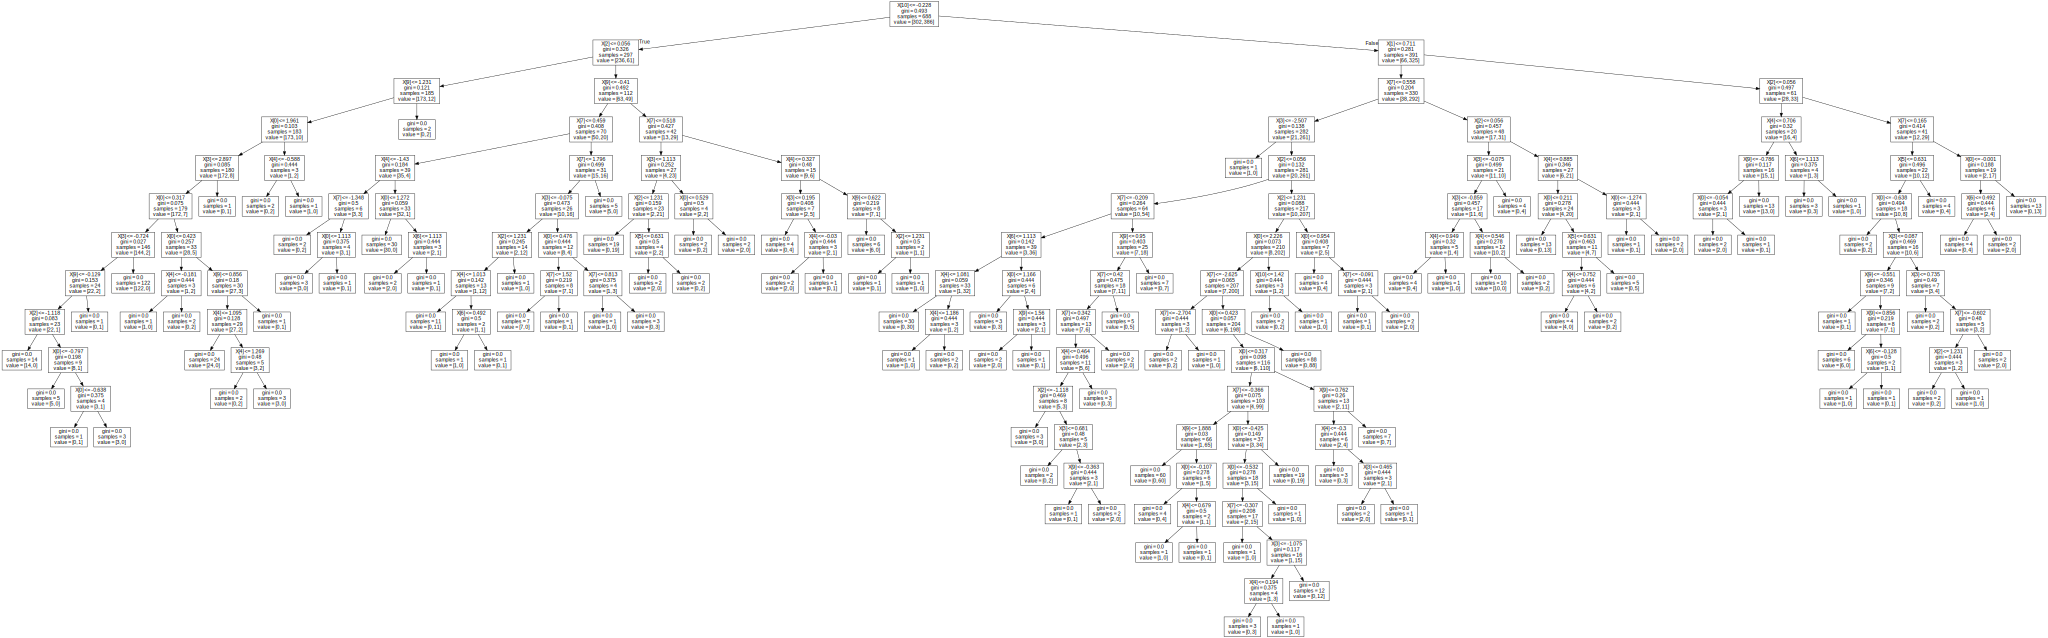

In [48]:
import graphviz
from sklearn.tree import export_graphviz
dot_data=tree.export_graphviz(model, out_file=None)
graph=graphviz.Source(dot_data)
graph.render('ds_std')
graph

**7-3-1 Decision tree with Hyperparameters tuning**

In [49]:
model1=tree.DecisionTreeClassifier(criterion='gini',max_depth=3,max_leaf_nodes=10)
model1.fit(x_train,y_train)
y_pred_hptun=model1.predict(x_test)
print("score:{}".format(accuracy_score(y_test, y_pred_hptun)))

score:0.8434782608695652


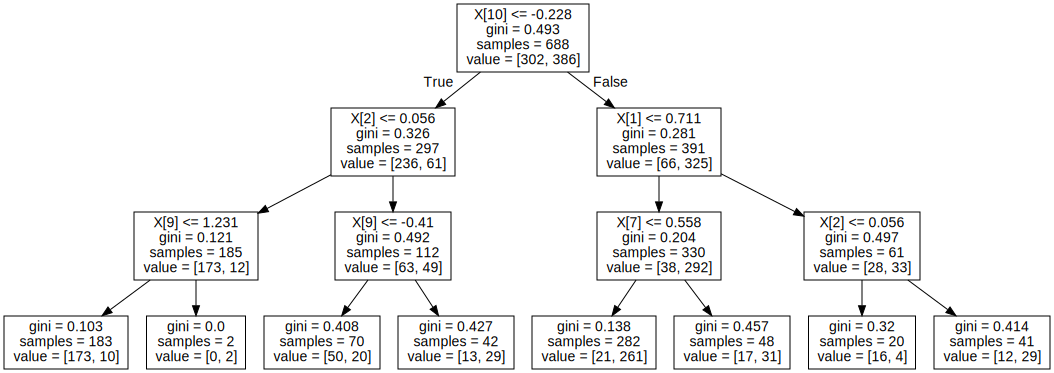

In [50]:
dot_data=tree.export_graphviz(model1, out_file=None)
graph=graphviz.Source(dot_data)
graph.render('ds_std')
graph

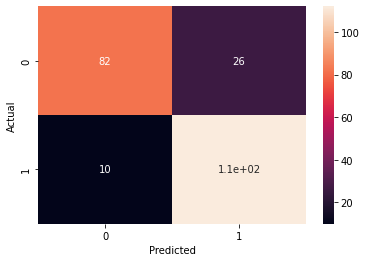

In [51]:
confusion_matrix = pd.crosstab(y_test, y_pred_hptun, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

Improvment of FN cases = 4,3% < 5%

**7-3-2 Random Forest Model**

In [52]:
from sklearn.ensemble import RandomForestClassifier #Importing Random Forest Classifier
from sklearn import metrics  # Importing metrics to test accuracy

In [53]:
clf=RandomForestClassifier(n_estimators=10,bootstrap=True)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred_rf=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_pred_rf,y_test))  #Measuring the accuracy of our model

Accuracy: 0.8695652173913043


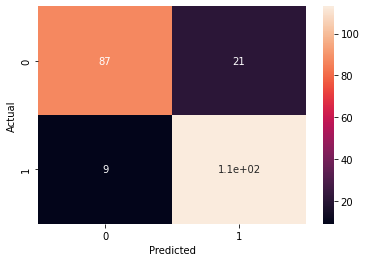

In [54]:
confusion_matrix = pd.crosstab(y_test, y_pred_rf, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

3,9 % of FN Cases remain stable

**7-3-2-1 Random Forest Model (Tuned Hyperparameters)**

In [55]:
clf=RandomForestClassifier(n_estimators=145,bootstrap=True,max_samples=250)  #Creating a random forest with 100 decision trees
clf.fit(x_train, y_train)  #Training our model
y_pred_rf=clf.predict(x_test)  #testing our model
print("Accuracy:", metrics.accuracy_score(y_pred_rf,y_test))  #Measuring the accuracy of our model

Accuracy: 0.8695652173913043


In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred_rf, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [56]:
y_score1 = logreg.predict_proba(x_test)[:,1]
y_score2 = knn.predict_proba(x_test)[:,1]
y_score3 = model1.predict_proba(x_test)[:,1]
y_score4 = clf.predict_proba(x_test)[:,1]

false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)
false_positive_rate2, true_positive_rate2, threshold1 = roc_curve(y_test, y_score2)
false_positive_rate3, true_positive_rate3, threshold1 = roc_curve(y_test, y_score3)
false_positive_rate4, true_positive_rate4, threshold1 = roc_curve(y_test, y_score4)

**7-4 ALL Models ROC Plotting**

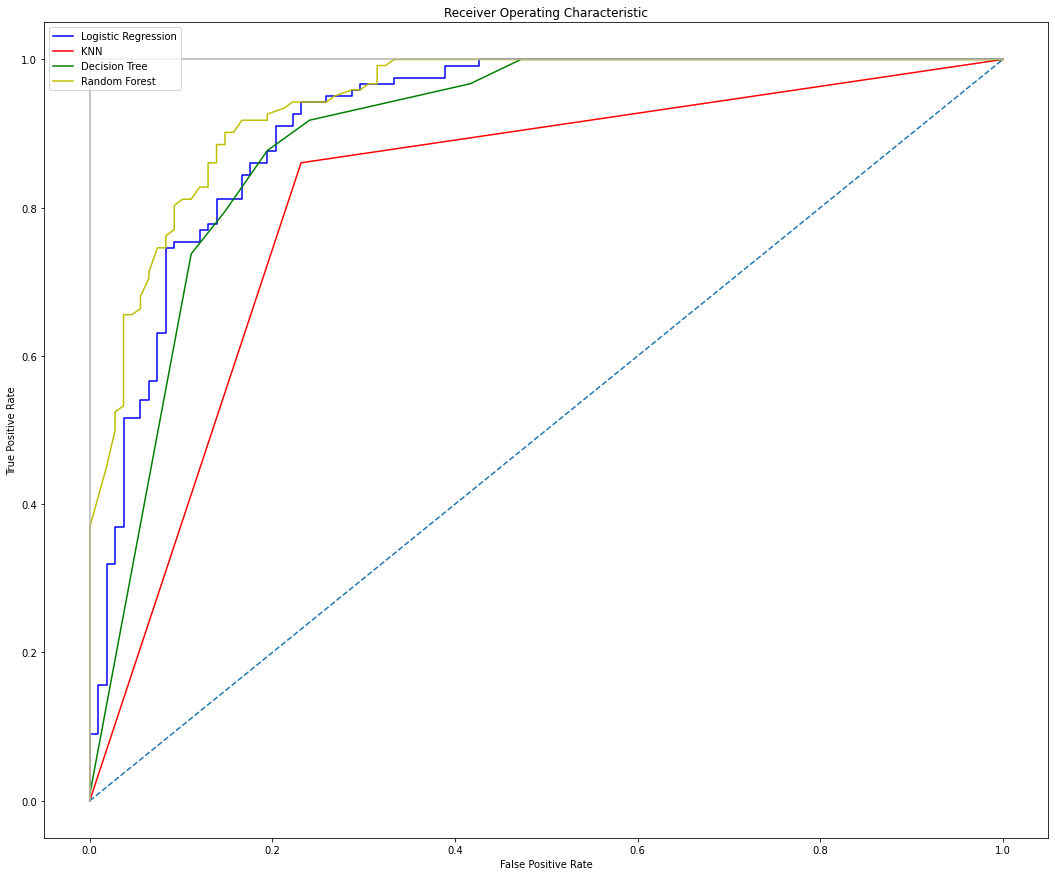

In [57]:
plt.subplots(1, figsize=(18,15))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate1, true_positive_rate1,color='b',label='Logistic Regression')
plt.plot(false_positive_rate2, true_positive_rate2,color='r',label='KNN')
plt.plot(false_positive_rate3, true_positive_rate3,color='g',label='Decision Tree')
plt.plot(false_positive_rate4, true_positive_rate4,color='y',label='Random Forest')
plt.legend(loc="upper left")
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#8-General Conclusion

After Plotting the ROC graph the most precise model of ML is the Random Forest one with an accuracy of 87% and a rate of 3,9 % of FN (important in this medical dataset).

This model is known by its good perforamances with many types of data.

The global Model Performances are considered good due to the inbalance in a key attributes as Sex (more than 75% are men),  The RestingECG, ChestPainType and ExerciseAngina with near 50% of cases for each feature represented only by unique value.

For example : 50 % of subjects who had developped a Heartfailure didn't felt a chestpain and the dataset contains 50% of occurences for this attribute.

The same for RestingECG: if the RestingECG is normal we have a probabilty of 50% to develop a heart failure.

The model could suffer of an underfitting preventing it to reach a better score.

A solution can bee a further studying and adding more cases to converge toward a better score.

* Logistic regression :score 0.85 
* KNN Decision :score 0.86
* Decision Tree  : score:0.84
* Random Forest: score 0.87